In [1]:
# Hyper Para Tuning

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum();

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
x = df.drop(['id', 'diagnosis'], axis = 1)
y = df['diagnosis']
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_scaled = scaler.fit_transform(x)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)

In [57]:
# Cross Validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 0, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [59]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [61]:
y_pred = knn.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

accuracy_score(y_test, y_pred)

0.956140350877193

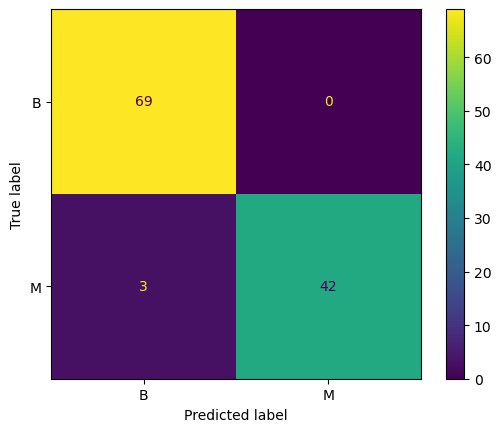

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [69]:
# define the parameter grid

params = {'n_neighbors': [3,5,7,9,12,14,15,18],
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [71]:
# Grid search cv

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = KNeighborsClassifier(),
                   param_grid = params,
                   verbose = 2,
                   cv = 5) # It is also known as k4 cross validation

In [73]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 12, 14, 15, 18],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [75]:
y_pred = grid.predict(x_test)

In [77]:
accuracy_score(y_test, y_pred)

0.956140350877193

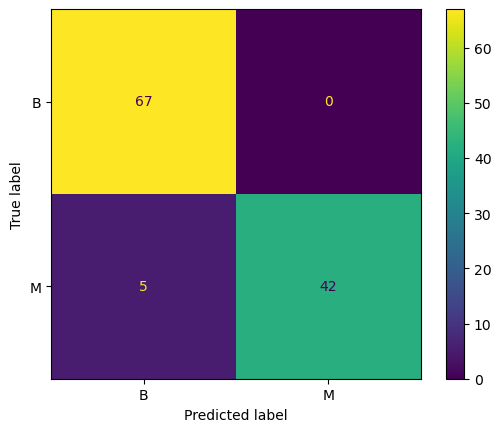

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [83]:
grid.fit(x_scaled, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END .....algorithm=auto, n_neighbors=5, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 12, 14, 15, 18],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [91]:
y_pred = grid.predict(x_test)

In [93]:
accuracy_score(y_test, y_pred)

0.9649122807017544

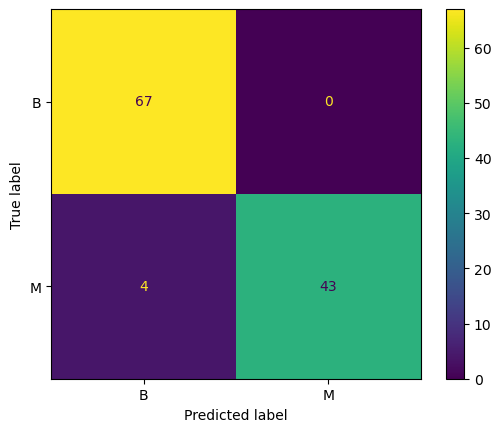

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [137]:
# Randomized Search

from sklearn.model_selection import RandomizedSearchCV

rgrid = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                           scoring = 'accuracy',
                           param_distributions = params,
                           n_iter = 2,
                           cv = 5)

In [139]:
rgrid.fit(x_scaled, y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=2,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [3, 5, 7, 9, 12, 14, 15,
                                                        18],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [141]:
y_pred = rgrid.predict(x_test)

In [143]:
accuracy_score(y_test, y_pred)

1.0

In [147]:
rgrid.best_params_

{'weights': 'distance', 'n_neighbors': 9, 'algorithm': 'kd_tree'}